In [2]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
import scipy.io as sio
import cmocean

import sys
sys.path.append('../')


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


sns.set_style("whitegrid")
sns.set_style("ticks")

rc('text', usetex=False)
rc("savefig", dpi=90)
rc("figure", dpi=90)

plt.rcParams['figure.figsize'] = 6, 4

import pandas as pd

pd.options.display.max_columns = 999
pd.options.display.max_rows = 400

import h5py

from datetime import datetime
str(datetime.now())

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


'2019-01-23 13:23:16.697807'

In [51]:
StClair_ERA5 = pd.read_csv('../../measurements/ERA5/ERA5_daily_reanalysis_StClair.csv')
CentralBasin_ERA5 = pd.read_csv('../../measurements/ERA5/ERA5_daily_reanalysis_LakeErie_CentralBasin.csv')
EasternBasin_ERA5 = pd.read_csv('../../measurements/ERA5/ERA5_daily_reanalysis_LakeErie_EasternBasin.csv')
WesternBasin_ERA5 = pd.read_csv('../../measurements/ERA5/ERA5_daily_reanalysis_LakeErie_WesternBasin.csv')

In [52]:
StClair_ERA5['evap'] = -StClair_ERA5['evap']
CentralBasin_ERA5['evap'] = -CentralBasin_ERA5['evap']
EasternBasin_ERA5['evap'] = -EasternBasin_ERA5['evap']
WesternBasin_ERA5['evap'] = -WesternBasin_ERA5['evap']

In [53]:
CentralBasin_ERA5.describe()

,precip,cloud,evap,surf_runoff
count,5843.000000,5843.000000,5843.000000,5.843000e+03
mean,4.008795,0.618869,2.521830,4.586968e-01
std,19.349613,0.288638,2.237996,1.103366e+01
min,0.000000,0.000000,-3.256513,-1.665335e-13
25%,0.034020,0.395992,0.723111,3.740358e-05
50%,0.630581,0.670820,2.070699,2.812247e-03
75%,3.645539,0.872627,4.009094,3.234279e-02
max,570.421997,1.000000,14.739750,4.226938e+02


In [54]:
for c in StClair_ERA5.columns[1:]:
    StClair_ERA5[c] = StClair_ERA5[c] * (StClair_ERA5[c] > 0)

In [55]:
StClair_ERA5['date'] = pd.to_datetime(StClair_ERA5['date'], errors='coerce')
StClair_ERA5['year'] = StClair_ERA5.date.dt.year
StClair_ERA5 = StClair_ERA5.groupby(['year']).mean()

StClair_ERA5['precip'] = StClair_ERA5['precip']*365
StClair_ERA5['evap'] = StClair_ERA5['evap']*365
StClair_ERA5['surf_runoff'] = StClair_ERA5['evap']*365

StClair_ERA5

,precip,cloud,evap,surf_runoff
year,,,,
2002,899.065970,0.608203,889.787865,324772.570886
2003,1040.962261,0.593978,840.426575,306755.699803
2004,1011.573943,0.643415,834.230528,304494.142779
2005,893.354426,0.586140,886.973494,323745.325203
2006,1138.188013,0.616976,873.195860,318716.488743
2007,1436.481506,0.556155,911.287353,332619.883984
2008,1151.196229,0.610614,867.198115,316527.311882
2009,1564.135169,0.618651,849.951188,310232.183497
2010,1261.280814,0.594625,899.489400,328313.630961


In [56]:
for c in WesternBasin_ERA5.columns[1:]:
    WesternBasin_ERA5[c] = WesternBasin_ERA5[c] * (WesternBasin_ERA5[c] > 0)

In [57]:
WesternBasin_ERA5['date'] = pd.to_datetime(WesternBasin_ERA5['date'], errors='coerce')
WesternBasin_ERA5['year'] = WesternBasin_ERA5.date.dt.year
WesternBasin_ERA5 = WesternBasin_ERA5.groupby(['year']).mean()

WesternBasin_ERA5['precip'] = WesternBasin_ERA5['precip']*365
WesternBasin_ERA5['evap'] = WesternBasin_ERA5['evap']*365
WesternBasin_ERA5['surf_runoff'] = WesternBasin_ERA5['surf_runoff']*365

WesternBasin_ERA5

,precip,cloud,evap,surf_runoff
year,,,,
2002,962.427157,0.607568,1011.007787,23.992658
2003,1110.943089,0.593844,933.517244,32.036671
2004,1051.107638,0.636796,952.978309,39.049945
2005,1007.387272,0.586757,995.917747,16.552356
2006,1192.957881,0.616557,997.968303,29.572417
2007,1561.386324,0.559823,1021.962154,25.154414
2008,1134.541495,0.602479,984.433400,41.760883
2009,1455.539728,0.612878,960.017746,325.800329
2010,1327.115208,0.581917,1020.684505,24.141560


In [58]:
CentralBasin_ERA5['date'] = pd.to_datetime(CentralBasin_ERA5['date'], errors='coerce')
CentralBasin_ERA5['year'] = CentralBasin_ERA5.date.dt.year
CentralBasin_ERA5 = CentralBasin_ERA5.groupby(['year']).mean()

CentralBasin_ERA5['precip'] = CentralBasin_ERA5['precip']*365
CentralBasin_ERA5['evap'] = CentralBasin_ERA5['evap']*365
CentralBasin_ERA5['surf_runoff'] = CentralBasin_ERA5['surf_runoff']*365

CentralBasin_ERA5

,precip,cloud,evap,surf_runoff
year,,,,
2002,1063.659117,0.617901,1068.315078,23.312982
2003,1267.926233,0.610609,914.188697,30.291892
2004,1198.433349,0.643444,932.514548,36.458068
2005,1154.198009,0.593872,997.540857,17.308033
2006,1279.061006,0.624767,957.816285,33.207383
2007,1593.615451,0.573795,1033.031781,26.633097
2008,1314.771932,0.610485,992.570566,44.836971
2009,1598.035557,0.618782,927.761209,326.111173
2010,1516.075476,0.590746,1026.793138,27.666216


In [59]:
EasternBasin_ERA5['date'] = pd.to_datetime(EasternBasin_ERA5['date'], errors='coerce')
EasternBasin_ERA5['year'] = EasternBasin_ERA5.date.dt.year
EasternBasin_ERA5 = EasternBasin_ERA5.groupby(['year']).mean()

EasternBasin_ERA5['precip'] = EasternBasin_ERA5['precip']*365
EasternBasin_ERA5['evap'] = EasternBasin_ERA5['evap']*365
EasternBasin_ERA5['surf_runoff'] = EasternBasin_ERA5['surf_runoff']*365

EasternBasin_ERA5

,precip,cloud,evap,surf_runoff
year,,,,
2002,1178.447569,0.633663,1007.126395,36.716290
2003,1308.058189,0.632510,826.207540,53.437211
2004,1380.441624,0.657704,862.345166,64.497484
2005,1230.700936,0.602625,930.739827,30.358819
2006,1417.667565,0.631710,884.901199,49.570669
2007,1591.569370,0.590235,941.776782,38.961618
2008,1455.857457,0.628582,929.046742,52.575188
2009,1730.360891,0.628541,866.088578,327.794992
2010,1645.666814,0.603255,957.884606,37.934856


In [11]:
import cdsapi
c = cdsapi.Client()
import calendar

 
def retrieve_era5():
    """      
       A function to demonstrate how to iterate efficiently over several years and months etc    
       for a particular era5 request.     
       Change the variables below to adapt the iteration to your needs.
       You can use the variable 'target' to organise the requested data in files as you wish.
       In the example below the data are organised in files per month. (eg "era5_daily_201510.grb")
    """
    yearStart = 2003
    yearEnd = 2017
    monthStart = 1
    monthEnd = 12
    for year in list(range(yearStart, yearEnd + 1)):
        for month in list(range(monthStart, monthEnd + 1)):
            startDate = '%04d%02d%02d' % (year, month, 1)
            numberOfDays = calendar.monthrange(year, month)[1]
            lastDate = '%04d%02d%02d' % (year, month, numberOfDays)
            target = "era5_daily_%04d%02d.grb" % (year, month)
            requestDates = (startDate + "/TO/" + lastDate)
            era5_request(requestDates, target)
    
def era5_request(requestDates, target):
    """      
        An ERA5 request for analysis pressure level data.
        Change the keywords below to adapt it to your needs.
        (eg to add or to remove  levels, parameters, times etc)
        Request cost per day is 112 fields, 14.2326 Mbytes
    """
    c.retrieve('reanalysis-era5-single-levels',
               {
        "class": "ea",                                  # do not change
        "dataset": "era5",                              # do not change
        "expver": "1",                                  # do not change
        "stream": "oper",                               # do not change
        "type": "an",                                   # analysis (versus forecast, fc)
        "date": requestDates,                           # dates, set automatically from above
        "levtype": "pl",                                # pressure level data (versus surface, sfc, and model level, ml)
        "levelist": "100/500/700/750/850/925/1000",     # levels, required only with levtype:pl and levtype:ml
        "param": "129.128/133.128/157.128/248.128",     # here: Geopotential (z), Specific humidity (q), Relative humidity (r), Fraction of cloud cover (cc); see http://apps.ecmwf.int/codes/grib/param-db
        "target": target,                               # output file name, set automatically from above
        "time": "00/06/12/18",                          # times of analysis (with type:an), or initialization time of forecast (with type:fc)
        "grid": "0.25/0.25",                            # Optional for GRIB, required for NetCDF. The horizontal resolution in decimal degrees. If not set, the archived grid as specified in the data documentation is used.
        "area": "43/-83/41/-78",                         # Optional. Subset (clip) to an area. Specify as N/W/S/E in Geographic lat/long degrees. Southern latitudes and western longitudes must be
                                                        # given as negative numbers. Requires "grid" to be set to a regular grid, e.g. "0.25/0.25".
        "format": "netcdf",                             # Optional. Output in NetCDF format. Requires that you also specify 'grid'. If not set, data is delivered in GRIB format, as archived.
       'product_type':'reanalysis',
       'variable':[
            'evaporation','surface_runoff','total_precipitation'],
    })
if __name__ == '__main__':
    retrieve_era5()

2019-01-25 20:55:14,595 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2019-01-25 20:55:14,831 INFO Request is queued
2019-01-25 22:01:45,222 INFO Request is failed
2019-01-25 22:01:45,226 ERROR Message: an internal error occurred processing your request
2019-01-25 22:01:45,227 ERROR Reason:  internal error
2019-01-25 22:01:45,228 ERROR   Traceback (most recent call last):
2019-01-25 22:01:45,229 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 156, in _consume
2019-01-25 22:01:45,229 ERROR       result = handle_locally()
2019-01-25 22:01:45,230 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/dispatcher.py", line 200, in <lambda>
2019-01-25 22:01:45,230 ERROR       lambda: self.handle_request(context, request_data),
2019-01-25 22:01:45,231 ERROR     File "/opt/cds/cdsinf/python/lib/cdsinf/runner/mappingprocessor.py", line 50, in handle_request
2019-01-25 22:01:45,231 ERROR       return self.

Exception: an internal error occurred processing your request. internal error.

In [8]:
# import cdstoolbox as ct

data = c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type':'reanalysis',
        'format':'netcdf',
        'variable':[
            'evaporation','surface_runoff','total_precipitation'
        ],
        'year':[
            '2011','2012','2013'
        ],
        'month':[
            '01','02','03',
            '04','05','06',
            '07','08','09',
            '10','11','12'
        ],
        'day':[
            '01','02','03',
            '04','05','06',
            '07','08','09',
            '10','11','12',
            '13','14','15',
            '16','17','18',
            '19','20','21',
            '22','23','24',
            '25','26','27',
            '28','29','30',
            '31'
        ],
        'time':[
            '00:00','01:00','02:00',
            '03:00','04:00','05:00',
            '06:00','07:00','08:00',
            '09:00','10:00','11:00',
            '12:00','13:00','14:00',
            '15:00','16:00','17:00',
            '18:00','19:00','20:00',
            '21:00','22:00','23:00'
        ]
    })

TypeError: retrieve() missing 1 required positional argument: 'request'

In [82]:
area_st_clair = 1100*1e6
area_lake_erie
area_western = 3680
area_central = 15390
area_eastern = 18960
area_lake_erie = area_eastern+ area_central +area_western
area_lake_erie

38030

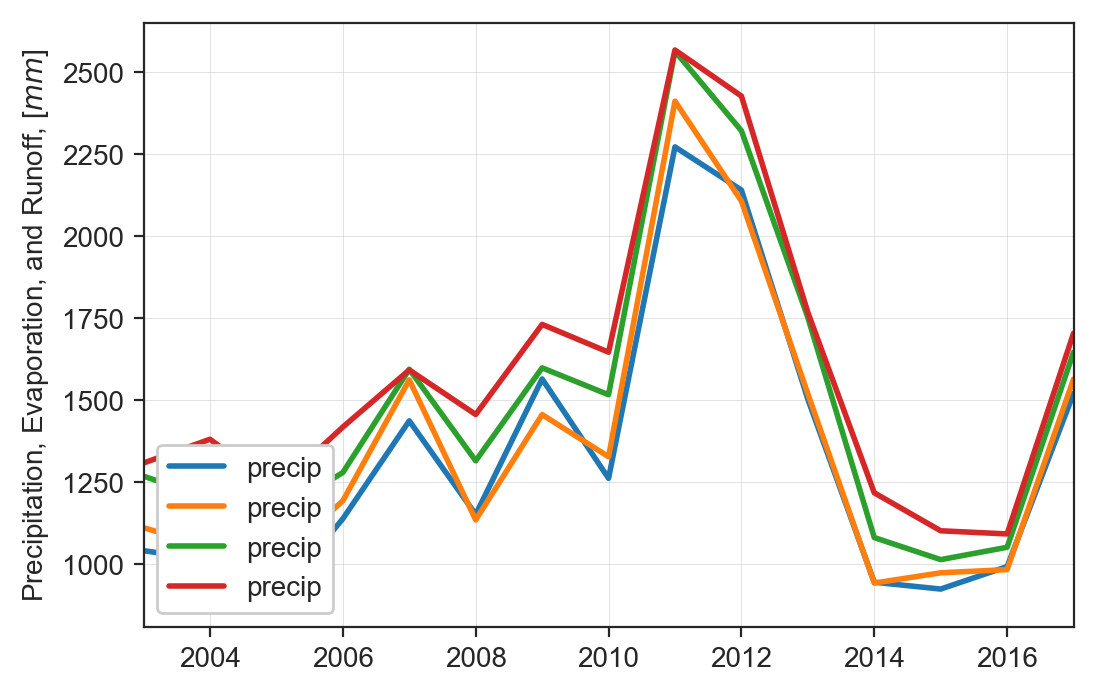

In [60]:
f, axes = plt.subplots(1,1, figsize=(6,4), dpi=200, sharex=True)

axes.plot(StClair_ERA5.index, StClair_ERA5.precip, lw=2)
axes.plot(WesternBasin_ERA5.index, WesternBasin_ERA5.precip, lw=2)
axes.plot(CentralBasin_ERA5.index, CentralBasin_ERA5.precip, lw=2)
axes.plot(EasternBasin_ERA5.index, EasternBasin_ERA5.precip, lw=2)
# axes.plot(StClair_ERA5.index, StClair_ERA5.evap, c=sns.color_palette()[1], lw=2)
axes.set_xlabel('')
axes.grid(lw=0.2)

# axes.set_ylim(0,None)
axes.set_xlim(2003,2017)
axes.set_ylabel('$mm$')
axes.set_ylabel('Precipitation, Evaporation, and Runoff, [$mm$]')


# ax2 = axes.twinx()

# ax2.plot(np.linspace(2003,2017, 15), st_clair_inflow_mm, c=sns.color_palette()[3], lw=2)
# ax2.plot(np.linspace(2003,2017, 15), detroit_river_mm, c=sns.color_palette()[4], lw=2)


# ax2.set_ylabel('Inflow and Outflow, [$mm$]')
# ax2.set_ylim(0,None)
# f.savefig('Mass Balance/wind_precip_1900.pdf')

axes.legend(loc=3, frameon=1, framealpha=1)
# ax2.legend(['Inflow', 'Outflow'], loc=4, frameon=1, framealpha=1)

# ax2.plot(np.linspace(2003,2017, 15), st_clair_inflow_mm, c=sns.color_palette()[3], lw=2)
# ax2.plot(np.linspace(2003,2017, 15), detroit_river_mm, c=sns.color_palette()[4], lw=2)


# ax2.set_ylabel('Inflow and Outflow, [$mm$]')
# ax2.set_ylim(0,None)
# f.savefig('Mass Balance/wind_precip_1900.pdf')

# axes.legend(['Precipitation', 'Evaporation'], loc=3, frameon=1, framealpha=1)
# ax2.legend(['Inflow', 'Outflow'], loc=4, frameon=1, framealpha=1)

Text(0,0.5,'ERA5 precipitation [$mm$]')

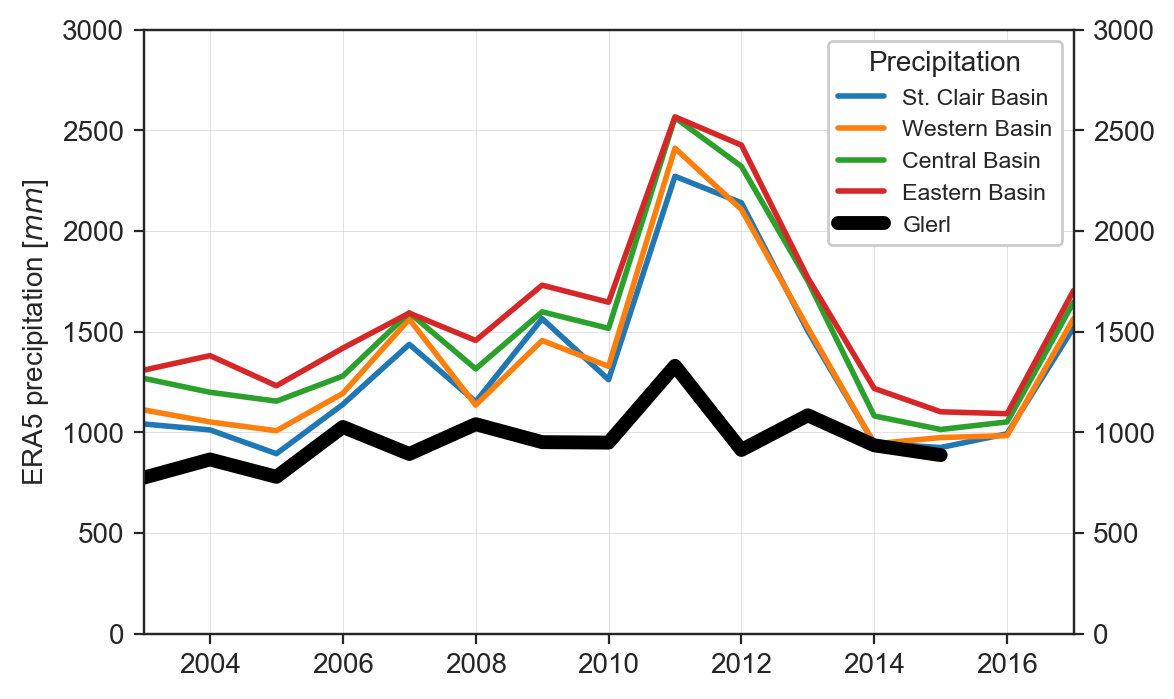

In [68]:
f, axes = plt.subplots(1,1, figsize=(6,4), dpi=200, sharex=True)

axes.plot(StClair_ERA5.index, StClair_ERA5.precip, c=sns.color_palette()[0], lw=2, label='St. Clair Basin')
axes.plot(StClair_ERA5.index, WesternBasin_ERA5.precip, c=sns.color_palette()[1], lw=2, label='Western Basin')
axes.plot(StClair_ERA5.index, CentralBasin_ERA5.precip, c=sns.color_palette()[2], lw=2, label='Central Basin')
axes.plot(StClair_ERA5.index, EasternBasin_ERA5.precip, c=sns.color_palette()[3], lw=2, label='Eastern Basin')


ax2 = axes.twinx()
# ax2.plot(StClair_ERA5.index, StClair_ERA5.evap, c=sns.color_palette()[0], ls='-.', lw=1, label='St. Clair Basin')
# ax2.plot(StClair_ERA5.index, WesternBasin_ERA5.evap, c=sns.color_palette()[1], ls='-.', lw=1, label='Western Basin')
# ax2.plot(StClair_ERA5.index, CentralBasin_ERA5.evap, c=sns.color_palette()[2], ls='-.', lw=1, label='Central Basin')
# ax2.plot(StClair_ERA5.index, EasternBasin_ERA5.evap, c=sns.color_palette()[3], ls='-.', lw=1, label='Eastern Basin')
# ax2.legend(title='Evaporation', loc=2, frameon=1, framealpha=1, fontsize='small')
# ax2.set_yticks([])

axes.plot(Precip_mm.Year, Precip_mm.Total, c='k', lw=5, label='Glerl')

# ax3 = ax2.twinx()
# ax3.plot(StClair_ERA5.index, StClair_ERA5.surf_runoff, c=sns.color_palette()[0], ls='-.', lw=1, label='St. Clair Basin')
# ax3.plot(StClair_ERA5.index, WesternBasin_ERA5.surf_runoff, c=sns.color_palette()[1], ls='-.', lw=1, label='Western Basin')
# ax3.plot(StClair_ERA5.index, CentralBasin_ERA5.surf_runoff, c=sns.color_palette()[2], ls='-.', lw=1, label='Central Basin')
# ax3.plot(StClair_ERA5.index, EasternBasin_ERA5.surf_runoff, c=sns.color_palette()[3], ls='-.', lw=1, label='Eastern Basin')
# ax3.legend(title='Evaporation', loc=2, frameon=1, framealpha=1, fontsize='small')
# # ax3.set_yticks([])

axes.legend(title='Precipitation', loc=1, frameon=1, framealpha=1, fontsize='small')
axes.set_xlabel('')
axes.grid(lw=0.2)

# axes.set_ylim(0,None)
axes.set_xlim(2003,2017)
axes.set_ylim(0,3000)
ax2.set_ylim(0,3000)
# ax3.set_ylim(0,3000)
axes.set_ylabel('$mm$')
axes.set_ylabel('ERA5 precipitation [$mm$]')



Text(0,0.5,'ERA5 Evaporation [$mm$]')

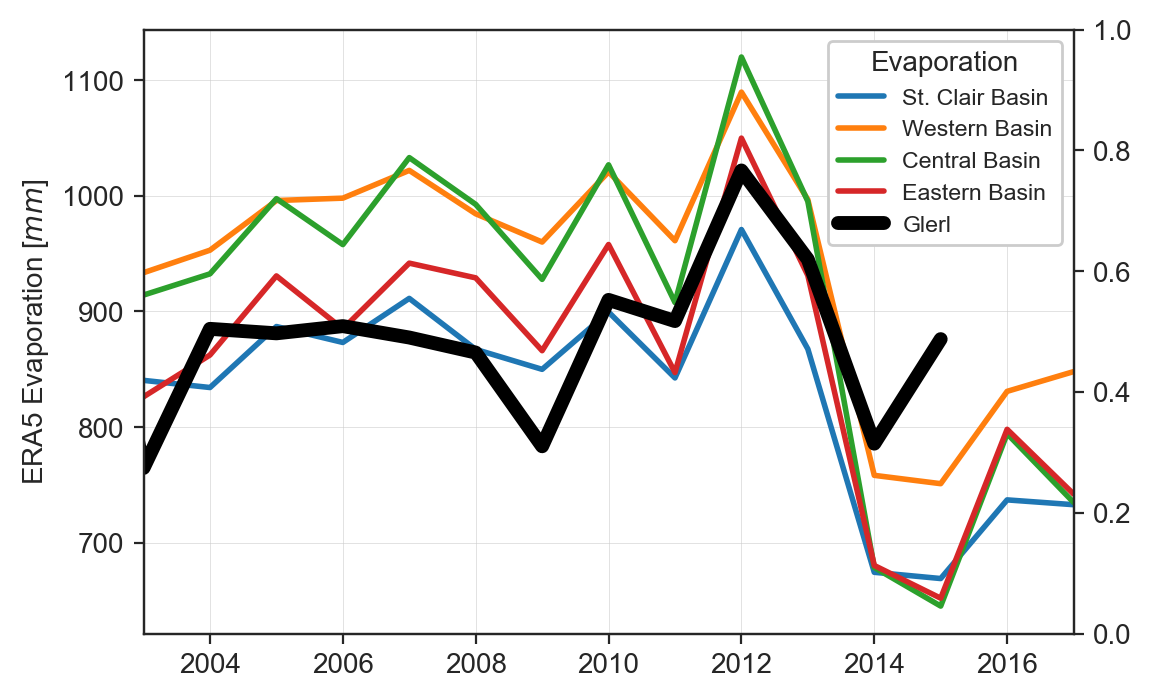

In [80]:
f, axes = plt.subplots(1,1, figsize=(6,4), dpi=200, sharex=True)

axes.plot(StClair_ERA5.index, StClair_ERA5.evap, c=sns.color_palette()[0], lw=2, label='St. Clair Basin')
axes.plot(StClair_ERA5.index, WesternBasin_ERA5.evap, c=sns.color_palette()[1], lw=2, label='Western Basin')
axes.plot(StClair_ERA5.index, CentralBasin_ERA5.evap, c=sns.color_palette()[2], lw=2, label='Central Basin')
axes.plot(StClair_ERA5.index, EasternBasin_ERA5.evap, c=sns.color_palette()[3], lw=2, label='Eastern Basin')


ax2 = axes.twinx()
# ax2.plot(StClair_ERA5.index, StClair_ERA5.evap, c=sns.color_palette()[0], ls='-.', lw=1, label='St. Clair Basin')
# ax2.plot(StClair_ERA5.index, WesternBasin_ERA5.evap, c=sns.color_palette()[1], ls='-.', lw=1, label='Western Basin')
# ax2.plot(StClair_ERA5.index, CentralBasin_ERA5.evap, c=sns.color_palette()[2], ls='-.', lw=1, label='Central Basin')
# ax2.plot(StClair_ERA5.index, EasternBasin_ERA5.evap, c=sns.color_palette()[3], ls='-.', lw=1, label='Eastern Basin')
# ax2.legend(title='Evaporation', loc=2, frameon=1, framealpha=1, fontsize='small')
# ax2.set_yticks([])

axes.plot(Evap_mm.Year, Evap_mm.Annual, c='k', lw=5, label='Glerl')

# ax3 = ax2.twinx()
# ax3.plot(StClair_ERA5.index, StClair_ERA5.surf_runoff, c=sns.color_palette()[0], ls='-.', lw=1, label='St. Clair Basin')
# ax3.plot(StClair_ERA5.index, WesternBasin_ERA5.surf_runoff, c=sns.color_palette()[1], ls='-.', lw=1, label='Western Basin')
# ax3.plot(StClair_ERA5.index, CentralBasin_ERA5.surf_runoff, c=sns.color_palette()[2], ls='-.', lw=1, label='Central Basin')
# ax3.plot(StClair_ERA5.index, EasternBasin_ERA5.surf_runoff, c=sns.color_palette()[3], ls='-.', lw=1, label='Eastern Basin')
# ax3.legend(title='Evaporation', loc=2, frameon=1, framealpha=1, fontsize='small')
# # ax3.set_yticks([])

axes.legend(title='Evaporation', loc=1, frameon=1, framealpha=1, fontsize='small')
axes.set_xlabel('')
axes.grid(lw=0.2)

# axes.set_ylim(0,None)
axes.set_xlim(2003,2017)
# axes.set_ylim(0,3000)
# ax2.set_ylim(0,3000)
# ax3.set_ylim(0,3000)
axes.set_ylabel('$mm$')
axes.set_ylabel('ERA5 Evaporation [$mm$]')



In [23]:
Area = 26858*1e6 #m2

In [13]:
station_45005 = pd.read_csv('../../measurements/Excel Files/task 1/Mass Balance/station_45005.csv', skiprows=1)

In [72]:
station_45005['WSPD'] = pd.to_numeric(station_45005['WSPD'], errors='coerce')
station_45005['GST'] = pd.to_numeric(station_45005['GST'], errors='coerce')
station_45005['ATMP'] = pd.to_numeric(station_45005['ATMP'], errors='coerce')
station_45005['YY'] = pd.to_numeric(station_45005['YY'], errors='coerce')
station_45005=station_45005.groupby(['YY']).mean().reset_index()
Precip_mm = pd.read_excel('../../measurements/glerl/Precip_Lake.xlsx', sheetname='ERI_mm', skiprows=3)
Precip_mm['Total'] = pd.to_numeric(Precip_mm['Total'], errors='coerce')
Precip_mm['Year'] = pd.to_numeric(Precip_mm['Year'], errors='coerce')

Runoff_mm = pd.read_excel('../../measurements/glerl/Runoff.xlsx', sheetname='ERI_mm', skiprows=4)
Runoff_mm['Ann'] = pd.to_numeric(Runoff_mm['Ann'], errors='coerce')
Runoff_mm['YEAR'] = pd.to_numeric(Runoff_mm['YEAR'], errors='coerce')
WindSpeed_Overlake = pd.read_excel('../../measurements/glerl/WindSpeed_Overlake.xlsx', sheetname='ERI', skiprows=3)
WindSpeed_Overlake['Annual'] = pd.to_numeric(WindSpeed_Overlake['Annual'], errors='coerce')
WindSpeed_Overlake['Year'] = pd.to_numeric(WindSpeed_Overlake['Year'], errors='coerce')

Evap_mm = pd.read_excel('../../measurements/glerl/Evaporation.xlsx', sheetname='ERI', skiprows=3)
Evap_mm['Annual'] = pd.to_numeric(Evap_mm['Ann'], errors='coerce')
Evap_mm['Year'] = pd.to_numeric(Evap_mm['Year'], errors='coerce')


In [71]:
Evap_mm

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Ann
0,1950,38.480000,38.890000,30.520000,14.060000,7.000000,49.830000,73.90000,113.480000,152.040000,138.72,191.880000,78.140000,926.940000
1,1951,31.250000,16.490000,15.750000,3.300000,15.550000,34.200000,79.05000,124.350000,178.930000,156.70,161.230000,74.780000,891.580000
2,1952,29.740000,22.410000,19.040000,5.820000,29.470000,37.480000,102.13000,121.890000,169.500000,235.02,110.330000,77.030000,959.860000
3,1953,34.340000,35.290000,20.990000,25.170000,20.440000,36.210000,96.74000,117.700000,188.230000,152.86,143.330000,124.160000,995.460000
4,1954,44.310000,13.880000,30.880000,7.260000,37.430000,37.120000,90.00000,129.420000,143.690000,165.01,138.540000,94.050000,931.590000
5,1955,48.020000,16.270000,22.380000,1.640000,30.830000,52.500000,83.96000,139.200000,170.490000,174.12,168.510000,74.880000,982.800000
6,1956,29.900000,16.200000,18.790000,4.600000,14.430000,30.430000,64.28000,95.100000,155.420000,125.26,155.520000,63.390000,773.320000
7,1957,40.340000,12.600000,11.350000,5.950000,21.990000,34.720000,71.98000,123.760000,126.180000,167.54,136.020000,68.690000,821.120000
8,1958,39.350000,23.580000,10.890000,5.000000,19.870000,46.130000,48.48000,111.020000,122.680000,163.92,137.550000,80.500000,808.970000
9,1959,20.190000,12.210000,14.640000,0.030000,-4.050000,29.370000,55.71000,75.060000,162.590000,187.28,151.900000,56.690000,761.620000


In [32]:
Runoff_mm[105:119].mean()[1:13]

JAN    114.226763
FEB     91.581745
MAR    164.926388
APR    115.514231
MAY     90.762773
JUN     67.904277
JUL     48.885788
AUG     30.530336
SEP     29.430294
OCT     43.392388
NOV     59.757487
DEC    113.965250
dtype: float64

Text(0,0.5,'Precipitation, [$mm$]')

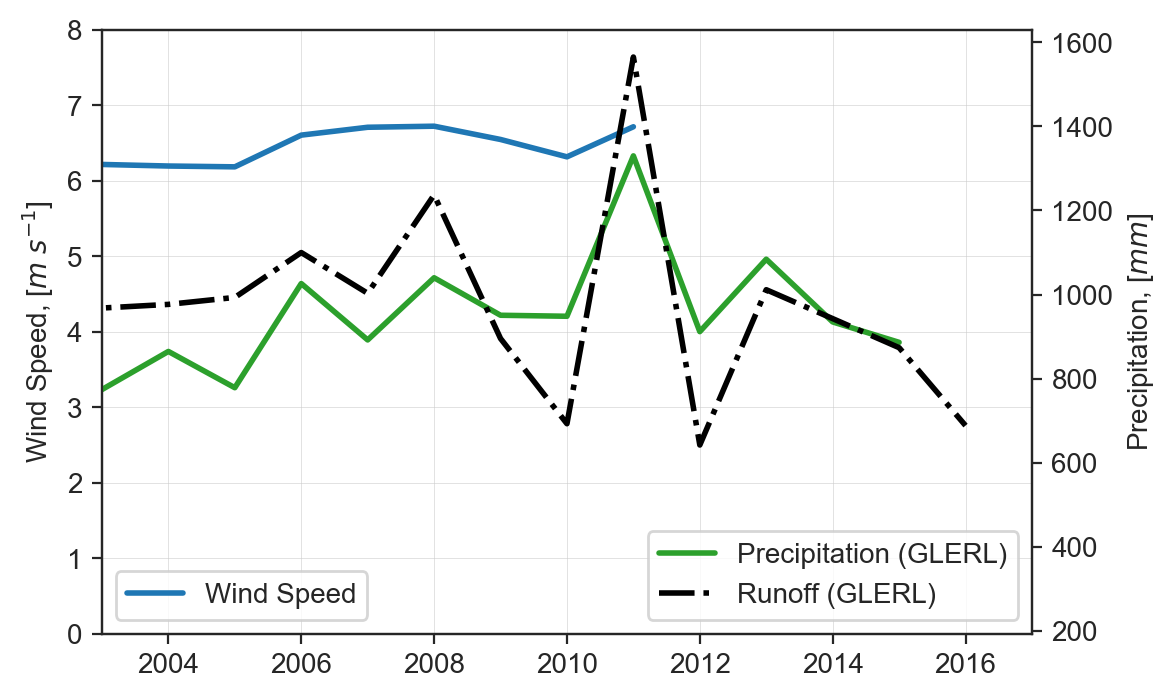

In [15]:
f, axes = plt.subplots(1,1, figsize=(6,4), dpi=200, sharex=True)
# axes.plot(df.YY, df.WSPD, c=sns.color_palette()[0])
axes.plot(WindSpeed_Overlake.Year, WindSpeed_Overlake.Annual, c=sns.color_palette()[0], lw=2)
# sns.boxplot(x="YY", y="WSPD", data=df, ax=axes[0], color=sns.color_palette()[0], fliersize=0)
# axes.plot(df.YY, df.GST, c=sns.color_palette()[0], ls=':')
# axes[1].plot(df.YY, df.ATMP, c=sns.color_palette()[0])
# for ax in axes:
# axes.set_xlim(1950,2015)
#     ax.set_ylim(0,15)
axes.set_xlabel('')
axes.grid(lw=0.2)
ax2 = axes.twinx()
ax2.plot(Precip_mm.Year, Precip_mm.Total, c=sns.color_palette()[2], lw=2)
ax2.plot(Runoff_mm.YEAR, Runoff_mm.Ann, 'k-.', lw=2)
ax2.legend(['Precipitation (GLERL)', 'Runoff (GLERL)'], loc=4)
axes.legend(['Wind Speed'], loc=3)
# ax2.set_ylim(0,2000)
axes.set_ylim(0,8)
axes.set_xlim(2003,2017)
axes.set_ylabel('Wind Speed, [$m$ $s^{-1}$]')
ax2.set_ylabel('Precipitation, [$mm$]')
# f.savefig('Mass Balance/wind_precip_1900.pdf')